#**MCA Example**

In the example below we are using a toy dataset known as the [balloons dataset](http://vxy10.github.io/2016/06/10/intro-MCA/) which was taken from [UCI datasets](https://archive.ics.uci.edu/ml/datasets.html). This dataset follows that the most common format for Categorigical variables, and so hopefully you will grasp the idea fairly quickly.

Install a package named "mca". There is a package called "prince" but I found that a lot of it was depracted, plus I found "mca" easier to use.

In [1]:
#!pip install  prince
!pip install  mca

  Preparing metadata (setup.py) ... done
  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6009 sha256=f1e72725c7f233c4ad8e23516a453d2e4c8557b2b3249abeb849c8dcecae328b
  Stored in directory: /root/.cache/pip/wheels/98/34/01/a42e47f7ccc0a4f4283780349f8d347391bd0d8e0d83198b5d
Successfully built mca


Now lets import the relevant libraries.

In [2]:
import mca
import pandas as pd
import numpy as np

np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
pd.set_option('display.precision', 5)
pd.set_option('display.max_columns', 25)

Reading the dataset from UCI.

In [3]:
import pandas as pd
X = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balloons/adult+stretch.data')

This example is going to read the data straight into pandas from the UCI repository. We are also going to use the [LabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html) to covert the muti-class labels to binary variables. If you would like to know more about all this go to [Machine Learning Mastery](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html) for a discussion as to how and why we do this.

In [4]:
from sklearn.preprocessing import LabelBinarizer
X.columns = ['Color', 'Size', 'Action', 'Age', 'Inflated']
X.head()

lb = LabelBinarizer()
X['Color']=lb.fit_transform(X['Color'])
X['Size']=lb.fit_transform(X['Size'])
X['Action']=lb.fit_transform(X['Action'])
X['Age']=lb.fit_transform(X['Age'])
X['Inflated']=lb.fit_transform(X['Inflated'])
print(X)

    Color  Size  Action  Age  Inflated
0       1     1       1    0         1
1       1     1       1    1         0
2       1     1       0    0         0
3       1     1       0    1         0
4       1     0       1    0         1
5       1     0       1    0         1
6       1     0       1    1         0
7       1     0       0    0         0
8       1     0       0    1         0
9       0     1       1    0         1
10      0     1       1    0         1
11      0     1       1    1         0
12      0     1       0    0         0
13      0     1       0    1         0
14      0     0       1    0         1
15      0     0       1    0         1
16      0     0       1    1         0
17      0     0       0    0         0
18      0     0       0    1         0


MCA calculations are implemented via MCA object. The default condition applies Benzécri correction for eigen values, therefore, benzecri flag has to be set to false. Below are the list of attributes for the MCA function, - .L Eigen values - .F Factor scores for columns. (components are linear combination of columns) - .G Factor scores for rows. (components are linear combination of rows) - .expl_var Explained variance. - .fs_r Projections onto the factor space, can also be computed by applying fs_r_sup on each of the row elements. - .cos_r Cosine distance between $i^{th}$ vector and $j^{th}$ factor (or row eigen vector) - .cont_r Contribution of individual categorical variable to the factor.

In the code below you will see how we have inserted the dataset into the MCA object. We have selected "benzecri=False" as it when left true it tends to "chop" the dataset down a bit to much.

We also print out  the factor scores for each row, the contribution of each row to the each factor and the eigen values for each factor.

In [5]:
import mca
print(X.columns)
#cols=['Color', 'Size', 'Action','Age', 'Inflated']
mca1 = mca.MCA(X,cols=['Color','Size', 'Action','Age','Inflated'],benzecri=False)
#mca1 = mca.MCA(X,benzecri=False)
#print(mca1.L)
print("Factor scores for each row ")
print(print(mca1.fs_r(N=5)))
print("contribution from each row to the components")
print(mca1.cont_r(N=5))
print(" Eigen values :",mca1.L," Total Accumulated variance:", mca1.L.sum())
#mca_fit.total_inertia_

Index(['Color', 'Size', 'Action', 'Age', 'Inflated'], dtype='object')
Factor scores for each row 
[[ 0.7054  0.0000  0.7586 -0.0000  0.0715]
 [-0.3866  0.0000  0.6261  0.6405 -0.1730]
 [-0.3866  0.0000  0.6261 -0.6405 -0.1730]
 [-0.8520  0.0000  0.5624 -0.0000  0.2624]
 [ 0.7835 -0.6333  0.1302 -0.0000  0.0632]
 [ 0.7835 -0.6333  0.1302 -0.0000  0.0632]
 [-0.3084 -0.6333 -0.0024  0.6405 -0.1813]
 [-0.3084 -0.6333 -0.0024 -0.6405 -0.1813]
 [-0.7739 -0.6333 -0.0660 -0.0000  0.2541]
 [ 0.7835  0.6333  0.1302 -0.0000  0.0632]
 [ 0.7835  0.6333  0.1302 -0.0000  0.0632]
 [-0.3084  0.6333 -0.0024  0.6405 -0.1813]
 [-0.3084  0.6333 -0.0024 -0.6405 -0.1813]
 [-0.7739  0.6333 -0.0660 -0.0000  0.2541]
 [ 0.8617 -0.0000 -0.4982 -0.0000  0.0549]
 [ 0.8617 -0.0000 -0.4982 -0.0000  0.0549]
 [-0.2303 -0.0000 -0.6308  0.6405 -0.1896]
 [-0.2303 -0.0000 -0.6308 -0.6405 -0.1896]
 [-0.6957 -0.0000 -0.6944 -0.0000  0.2458]]
None
contribution from each row to the components
[[ 0.0652  0.0000  0.1632  0.0000 

In the next peice of code we are organizing the data into a convient table.

In [6]:
fs, cos, cont = 'Factor score','Squared cosines', 'Contributions x 1000'
table3 = pd.DataFrame(columns=X.index, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], range(1, 3)]))

table3.loc[fs,    :] = mca1.fs_r(N=2).T
table3.loc[cos,   :] = mca1.cos_r(N=2).T
table3.loc[cont,  :] = mca1.cont_r(N=2).T * 1000

np.round(table3.astype(float), 2)

0      1      2      3       4       5       6   \
Factor score         1   0.71  -0.39  -0.39  -0.85    0.78    0.78   -0.31   
                     2   0.00   0.00   0.00   0.00   -0.63   -0.63   -0.63   
Squared cosines      1   0.46   0.15   0.15   0.65    0.59    0.59    0.10   
                     2   0.00   0.00   0.00   0.00    0.39    0.39    0.43   
Contributions x 1000 1  65.20  19.58  19.58  95.12   80.45   80.45   12.47   
                     2   0.00   0.00   0.00   0.00  100.00  100.00  100.00   

                            7       8       9       10      11      12  \
Factor score         1   -0.31   -0.77    0.78    0.78   -0.31   -0.31   
                     2   -0.63   -0.63    0.63    0.63    0.63    0.63   
Squared cosines      1    0.10    0.56    0.59    0.59    0.10    0.10   
                     2    0.43    0.38    0.39    0.39    0.43    0.43   
Contributions x 1000 1   12.47   78.47   80.45   80.45   12.47   12.47   
                     2  100.00  100.00  100.00  100.00  100.00  100.00   

                            13     14     15    16    17     18  
Factor score         1   -0.77   0.86   0.86 -0.23 -0.23  -0.70  
                     2    0.63  -0.00  -0.00 -0.00 -0.00  -0.00  
Squared cosines      1    0.56   0.75   0.75  0.06  0.06   0.47  
                     2    0.38   0.00   0.00  0.00  0.00   0.00  
Contributions x 1000 1   78.47  97.30  97.30  6.95  6.95  63.42  
                     2  100.00   0.00   0.00  0.00  0.00   0.00

[[0.705386799624832 -0.38658629949598855 -0.38658629949598816
  -0.8520140574664022 0.7835387510478174 0.7835387510478167
  -0.30843434807300435 -0.3084343480730043 -0.7738621060434181
  0.7835387510478171 0.7835387510478171 -0.3084343480730042
  -0.3084343480730041 -0.773862106043418 0.8616907024708014
  0.8616907024708014 -0.23028239665001998 -0.2302823966500197
  -0.6957101546204335]
 [6.264952260824816e-15 4.9997597763530675e-15 4.716520318055213e-15
  4.293758948940224e-15 -0.6333333333333302 -0.6333333333333302
  -0.6333333333333315 -0.6333333333333316 -0.6333333333333322
  0.6333333333333326 0.6333333333333326 0.6333333333333313
  0.6333333333333312 0.6333333333333308 -3.850881208441923e-15
  -3.850881208441923e-15 -5.216660703577424e-15 -5.4056749524958045e-15
  -5.9078284827356275e-15]]


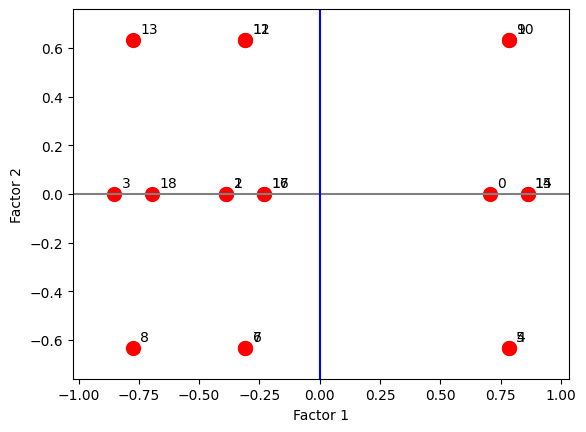

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

points = table3.loc[fs].values
labels = table3.columns.values
print(points)
plt.figure()
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='blue')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.scatter(*points, s=120, marker='o', c='r', alpha=1, linewidths=0)
for label, x, y in zip(labels, *points):
    plt.annotate(label, xy=(x, y), xytext=(x + .03, y + .03))
plt.show()

#**Conclusions**

We can see from our analysis that the first 4 components contribute to the lions share of the variance. This means we could potenially drop 5th component and cosequently reduce our dataset.

We have also shown how you can create new factors that ensure that correlation within categorical variables can be avoided.